### EDA on Healthcare Census in India

Problem Statement 1: (Keep the relevant data)
The census 2011 file contains many fields, which we may not use. Remove some columns so that we are left with only relevant data.


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
census_df = pd.read_csv('census_2011.csv')
census_df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,1048.0,...,94.0,588.0,71.0,101.0,172.0,74.0,10.0,84.0,15.0,1119.0
1,2,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,NaN,...,126.0,562.0,72.0,89.0,161.0,96.0,28.0,124.0,18.0,1066.0
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,488.0,...,46.0,122.0,15.0,22.0,NaN,20.0,NaN,NaN,17.0,242.0
3,4,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,18.0,...,27.0,114.0,12.0,18.0,30.0,19.0,3.0,22.0,7.0,214.0
4,5,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,556.0,...,78.0,346.0,35.0,50.0,85.0,59.0,8.0,67.0,12.0,629.0


In [3]:
census_df.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [4]:
census_df_new = census_df[['State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Rural_Households', 'Urban_Households', 'Households', 'Age_Group_0_29',
                          'Age_Group_30_49', 'Age_Group_50', 'Age not stated']]

# 	State name
# 	District name
# 	Population
# 	Male
# 	Female
# 	Literate
# 	Male_Literate
# 	Female_Literate
# 	Rural_Households
# 	Urban_Households
# 	Households
# 	Age_Group_0_29
# 	Age_Group_30_49
# 	Age_Group_50
# 	Age not stated

census_df_new.head()

,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


Problem Statement 2: (Rename the Column names)
For uniformity in the datasets and taking into consideration the census year, we need to rename some columns. 


In [5]:


# 	State name  to State/UT
# 	District name  to District
# 	Male_Literate to Literate_Male
# 	Female_Literate to Literate_Female
# 	Rural_Households  to Households_Rural
# 	Urban_ Households  to Households_Urban
# 	Age_Group_0_29 to Young_and_Adult
# 	Age_Group_30_49 to Middle_Aged
# 	Age_Group_50 to Senior_Citizen
# 	Age not stated to Age_Not_Stated


census_df_new.rename({'State name' : 'State/UT',
                     'District name' : 'District',
                     'Male_Literate' : 'Literate_Male',
                     'Female_Literate' : 'Literate_Female',
                     'Rural_Households' : 'Households_Rural',
                     'Urban_Households' : 'Households_Urban',
                     'Age_Group_0_29' : 'Young_and_Adult',
                     'Age_Group_30_49' : 'Middle_Aged',
                     'Age_Group_50' : 'Senior_Citizen',
                     'Age not stated' : 'Age_Not_Stated'},
                    axis = 1,
                    inplace=True)
census_df_new.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


### Problem Statement 3: (Rename State/UT Names)


The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.


In [6]:

census_df_new['State/UT'] = census_df_new['State/UT'].str.title()
census_df_new

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu And Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu And Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu And Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu And Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu And Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman And Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman And Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [7]:

def update(state):
    return state.replace(' And ', ' and ')
census_df_new['State/UT'] = census_df_new['State/UT'].apply(update)

census_df_new

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,Pondicherry,Mahe,41816.0,19143.0,22673.0,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,NaN,9428.0,85.0
636,Pondicherry,Karaikal,200222.0,97809.0,102413.0,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0
637,Andaman and Nicobar Islands,Nicobars,36842.0,20727.0,NaN,25332.0,15397.0,9935.0,15958.0,0.0,15958.0,18786.0,12088.0,5922.0,46.0
638,Andaman and Nicobar Islands,North AND Middle Andaman,105597.0,54861.0,50736.0,78683.0,43186.0,35497.0,39091.0,1094.0,40185.0,57350.0,30741.0,17464.0,42.0


In [8]:
# def Format_data(census_df_new):
#     # iterate over all the rows
#     for i in range(census_df_new.shape[0]): #for i in range(4)
        
#         new_l = []

#         for j in (census_df_new[census_df_new.iat[i, 0]].title().split()):
#             if j == 'And':
#                 new_l.append(j.lower())
#             else:
#                 new_l.append(j)

#         new_l
#         y= ""
#         for x in new_l:
#             y += ' ' + x
        

#         census_df_new.iat[i, 0]= y.strip()
# # Let's call the function
# Format_data(census_df_new)
  
# # Print the Dataframe
# print(census_df_new)

In [9]:
census_df_new['State/UT'].value_counts()

Uttar Pradesh                  71
Madhya Pradesh                 50
Bihar                          38
Maharashtra                    35
Rajasthan                      33
Tamil Nadu                     32
Karnataka                      30
Orissa                         30
Assam                          27
Gujarat                        26
Jharkhand                      24
Andhra Pradesh                 23
Jammu and Kashmir              22
Haryana                        21
Punjab                         20
West Bengal                    19
Chhattisgarh                   18
Arunachal Pradesh              16
Kerala                         14
Uttarakhand                    13
Himachal Pradesh               12
Nagaland                       11
Manipur                         9
Nct Of Delhi                    9
Mizoram                         8
Meghalaya                       7
Tripura                         4
Sikkim                          4
Pondicherry                     4
Andaman and Ni

### Problem Statement 4: (New State/UT formation)



	In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

	In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 


In [ ]:
df_Telangana = pd.read_csv('Telangana.txt')
df_Telangana

In [ ]:
for i in df_Telangana['districts']:
    df_census_new.loc[(df_census_new['District'] == i), ['State/UT']] = 'Telangana'

In [ ]:
df_census_new[df_census_new['State/UT'] == 'Telangana']

In [10]:
census_df_new.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,NaN,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,NaN,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Jammu and Kashmir,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Jammu and Kashmir,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,NaN,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


In [11]:


# for i in census_df_new['District']:
#     if i in list_telangana:
#         census_df_new['State/UT']
#     else:
#         pass
    
# # census_df_new


# def update_stateName(state):
    
#     list_telangana = []
    

        
    
# census_df_new['State/UT'] = census_df_new['State/UT'].apply(update_stateName)

# census_df_new

# list_ts = ['Adilabad','Nizamabad','Karimnagar', 'Medak', 'Hyderabad' , 'Rangareddy', 'Mahbubnagar' , 'Nalgonda' , 'Warangal' ,'Khammam']

#     for j in census_df_new['District']:
#         if j == 'Adilabad'or'Nizamabad'or'Karimnagar'or 'Medak'or 'Hyderabad' or 'Rangareddy'or 'Mahbubnagar' or 'Nalgonda' or 'Warangal' or'Khammam':
#             return state.replace('Andhra Pradesh', 'Telangana')
#         else:
#             continue




census_df_new.loc[(census_df_new['District'] == 'Adilabad'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Nizamabad'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Karimnagar'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Medak'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Hyderabad'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Rangareddy'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Mahbubnagar'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Nalgonda'), ['State/UT']] = 'Telangana'
census_df_new.loc[(census_df_new['District'] == 'Adilabad'), ['State/UT']] = 'Telangana'

In [12]:
df_telangana = census_df_new[census_df_new['State/UT'] == 'Telangana']
df_telangana

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0


In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 

In [13]:
census_df_new.loc[(census_df_new['District'] == 'Leh(Ladakh)'), ['State/UT']] = 'Laddakh'
census_df_new.loc[(census_df_new['District'] == 'Kargil'), ['State/UT']] = 'Laddakh'

In [14]:
df_laddakh = census_df_new[census_df_new['State/UT'] == 'Laddakh']
df_laddakh


,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,NaN,250.0
3,Laddakh,Kargil,140802.0,NaN,63017.0,NaN,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0


In [15]:
# census_df_new['District']

### Problem Statement 5: (Find and process Missing Data)


Find and store the percentage of data missing for each column.
Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

Hint:

	Population = Male + Female

	Literate = Literate_Male + Literate_Female

	Population  = Young_and_Adult+  Middle_Aged + Senior_Citizen + Age_Not_Stated

	Households = Households_Rural + Households_Urban 

Create a visualization that compares the amount of missing data before and after the data-filling process was done. 


In [202]:
percent_missingData = census_df_new.isnull().sum() * 100 / len(census_df_new)  #number of records in the data
percent_missingData

State/UT            0.00000
District            0.00000
Population          0.15625
Male                0.15625
Female              0.00000
Literate            0.31250
Literate_Male       0.31250
Literate_Female     0.31250
Households_Rural    0.93750
Households_Urban    0.46875
Households          0.78125
Young_and_Adult     0.62500
Middle_Aged         0.93750
Senior_Citizen      1.25000
Age_Not_Stated      0.46875
dtype: float64

In [17]:
perc_missingData_copy = percent_missingData.copy()
perc_missingData_copy

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

In [201]:
# census_df_new.plot(figsize = (8,4), kind='bar', color={'Before' : 'lightblue', 'After':'purple'})
# plt.xlabel('\nPercent Missing Data Before Processing & After Preprocessing')
# plt.ylabel('Percentage')
# plt.title('Data Preprocessing\n')

Text(0.5, 1.0, 'Before Data Filling')

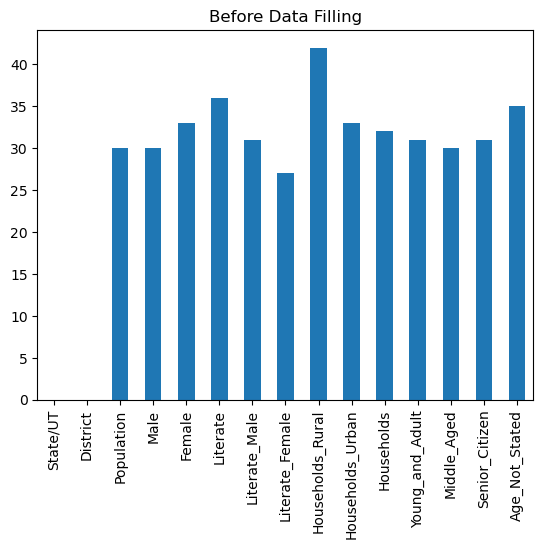

In [19]:
census_df_new.isnull().sum().plot.bar()
plt.title('Before Data Filling')

In [20]:
perc_missingData_copy

State/UT            0.00000
District            0.00000
Population          4.68750
Male                4.68750
Female              5.15625
Literate            5.62500
Literate_Male       4.84375
Literate_Female     4.21875
Households_Rural    6.56250
Households_Urban    5.15625
Households          5.00000
Young_and_Adult     4.84375
Middle_Aged         4.68750
Senior_Citizen      4.84375
Age_Not_Stated      5.46875
dtype: float64

In [21]:
# census_df_new.isnull().sum()

In [22]:
census_df_new['Population']=census_df_new['Population'].fillna((census_df_new['Male']+census_df_new['Female']))
census_df_new['Literate']=census_df_new['Literate'].fillna((census_df_new['Literate_Male']+census_df_new['Literate_Female']))
census_df_new['Male']=census_df_new['Male'].fillna((census_df_new['Population']-census_df_new['Female']))
census_df_new['Female']=census_df_new['Female'].fillna((census_df_new['Population']-census_df_new['Male']))
census_df_new['Literate_Male']=census_df_new['Literate_Male'].fillna((census_df_new['Literate']-census_df_new['Literate_Female']))
census_df_new['Literate_Female']=census_df_new['Literate_Female'].fillna((census_df_new['Literate']-census_df_new['Literate_Male']))
census_df_new['Households']=census_df_new['Households'].fillna((census_df_new['Households_Rural']+census_df_new['Households_Urban']))

census_df_new['Households_Rural']=census_df_new['Households_Rural'].fillna((census_df_new['Households']-census_df_new['Households_Urban']))
census_df_new['Households_Urban']=census_df_new['Households_Urban'].fillna((census_df_new['Households']-census_df_new['Households_Rural']))
census_df_new['Young_and_Adult']=census_df_new['Young_and_Adult'].fillna((census_df_new['Population']-census_df_new['Middle_Aged']-census_df_new['Senior_Citizen']-census_df_new['Age_Not_Stated']))
census_df_new['Middle_Aged']=census_df_new['Middle_Aged'].fillna((census_df_new['Population']-census_df_new['Young_and_Adult']-census_df_new['Senior_Citizen']-census_df_new['Age_Not_Stated']))
census_df_new['Senior_Citizen']=census_df_new['Senior_Citizen'].fillna((census_df_new['Population']-census_df_new['Middle_Aged']-census_df_new['Young_and_Adult']-census_df_new['Age_Not_Stated']))
census_df_new['Age_Not_Stated']=census_df_new['Age_Not_Stated'].fillna((census_df_new['Population']-census_df_new['Middle_Aged']-census_df_new['Senior_Citizen']-census_df_new['Young_and_Adult']))

In [23]:
missing_data = pd.DataFrame(
{
#     'columns' : census_df_new.columns,
    'Before' : perc_missingData_copy,
    'After' : percent_missingData
})
missing_data

,Before,After
State/UT,0.00000,0.00000
District,0.00000,0.00000
Population,4.68750,4.68750
Male,4.68750,4.68750
Female,5.15625,5.15625
Literate,5.62500,5.62500
Literate_Male,4.84375,4.84375
Literate_Female,4.21875,4.21875
Households_Rural,6.56250,6.56250
Households_Urban,5.15625,5.15625


Text(0.5, 1.0, 'Data Preprocessing\n')

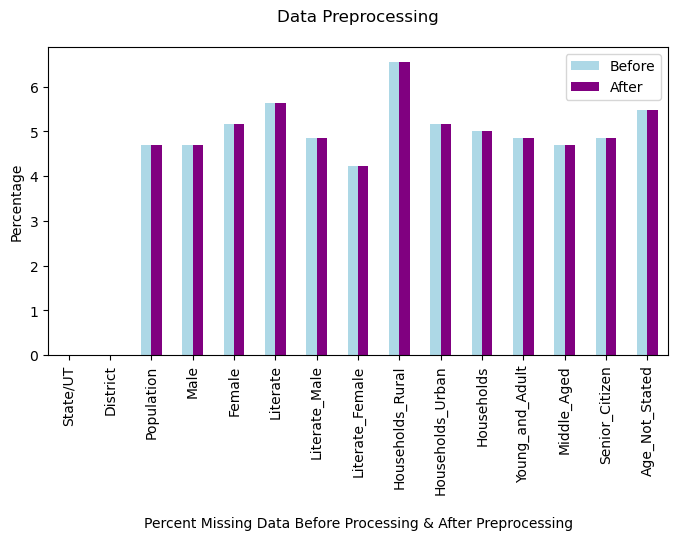

In [24]:
missing_data.plot(figsize = (8,4), kind='bar', color={'Before' : 'lightblue', 'After':'purple'})
plt.xlabel('\nPercent Missing Data Before Processing & After Preprocessing')
plt.ylabel('Percentage')
plt.title('Data Preprocessing\n')

# plt.figure(figsize=(9,4))
# plt.xticks(rotation=90)
# sns.barplot(data=missing_data,
#             x = 'Before',
#             y = 'After')

In [25]:
# plt.figure(figsize=(15,4.6))
# plt.xticks(rotation=90)
# sns.barplot(x='State/UT', y ='Perc_LP', data=df2)
# plt.title('Percentage of households that have toilet in premise to the total number of households.\n')

In [26]:
# import numpy as np

# def update_male(census_df_new):
    
#     for i in range(census_df_new.shape[0]):
#         census_df_new.loc[i,3]=census_df_new.loc[i,3].fillna((census_df_new['Population']-census_df_new['Female']))

# update_male(census_df_new)

### Problem Statement 6: (Save Data)


Save the processed data to a CSV file named “census.csv” in the “Clean_Data” folder.

'to_csv' to convert pandas dataframe to csv file

In [27]:
#creating census.csv file
# census_csv_file = census_df_new.to_csv('census.csv', index = True)

In [28]:
#taking census file as df
df = pd.read_csv('Clean_Data/census.csv',index_col='Unnamed: 0')
df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Laddakh,Kargil,140802.0,77785.0,63017.0,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Jammu and Kashmir,Punch,476835.0,251899.0,224936.0,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0


### Problem Statement 7: (Process the relevant data)

From the housing data(Data/housing.csv) read the following columns which may be relevant to the requirement.
	District Name
	Rural/Urban
	Total Number of households
	Total Number of Livable
	Total Number of Dilapidated
	Latrine_premise


In [29]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,State Code,State Name,District Code,District Name,Tehsil Code,Tehsil Name,Town Code/Village code,Ward No,Area Name,Rural/Urban,...,Contition_T_Total,Contition_T_Good,Contition_T_Livable,Contition_T_Dilapidated,Contition_R_Total,Residence_Good,Residence_Livable,Residence_Dilapidated,Residence_cum_other,Residence_cum_Good
0,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Rural,...,100,33.6,58.1,8.3,90.9,32.7,51.0,7.2,9.1,1.0
1,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Total,...,100,34.8,57.3,7.9,91.0,33.8,50.2,6.9,9.0,0.9
2,1,JAMMU & KASHMIR,1,Kupwara,0,Kupwara,0,0,District - Kupwara,Urban,...,100,45.7,49.5,4.8,91.8,45.0,42.2,4.5,8.2,0.7
3,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Rural,...,100,49.7,46.3,3.9,97.2,49.0,44.5,3.7,2.8,0.7
4,1,JAMMU & KASHMIR,2,Badgam,0,Badgam,0,0,District - Badgam,Total,...,100,51.6,44.7,3.8,97.3,50.8,43.0,3.5,2.7,0.8


In [30]:
housing_df.columns

Index(['State Code', 'State Name', 'District Code', 'District Name',
       'Tehsil Code', 'Tehsil Name', 'Town Code/Village code', 'Ward No',
       'Area Name', 'Rural/Urban',
       ...
       'Contition_T_Total', 'Contition_T_Good', 'Contition_T_Livable',
       'Contition_T_Dilapidated', 'Contition_R_Total', 'Residence_Good',
       'Residence_Livable', 'Residence_Dilapidated', 'Residence_cum_other',
       'Residence_cum_Good'],
      dtype='object', length=156)

In [31]:
housing_df.shape

(1908, 156)

In [32]:
#taking the relevant columns from the housing.csv dataset

housing_df_new = housing_df[['District Name', 'Rural/Urban', 'Total Number of households', 'Total Number of Livable','Total Number of Dilapidated','Latrine_premise']]

housing_df_new.head(10)

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3
5,Badgam,Urban,100,33.8,2.6,90.4
6,Leh(Ladakh),Rural,100,51.5,2.1,88.1
7,Leh(Ladakh),Total,100,52.4,1.8,90.4
8,Leh(Ladakh),Urban,100,54.6,1.1,95.8
9,Kargil,Rural,100,73.3,3.5,96.8


In [33]:
#renaming 'District Name' column in housing_df_new DF to 'District'

housing_df_new.rename({'District Name' : 'District'},
                     axis=1,
                     inplace=True)

In [34]:
housing_df_new.head()

,District,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3


In [35]:
#joining the data from census.csv from Clean_Data folder and housing.csv dataset
#housing_df_new is a dataframe from housing.csv dataset

merge_df = pd.merge(left=df,
                   
                  right=housing_df_new,
                   
                  on='District',
                   
                  how='inner')
merge_df.head(5)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,100,58.1,8.3,48.9
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,100,57.3,7.9,50.9
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,100,49.5,4.8,70.2
3,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Rural,100,46.3,3.9,83.3
4,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Total,100,44.7,3.8,84.3


In [36]:
# merge_df.isnull().sum()

In [37]:
# merge_df.columns

In [38]:
#Changing 'Total number of households' values in joined DF 
#from percentage terms to absolute terms 
#using households, households_rural,households_urban columns

#and checking the top 3 records

merge_df.loc[merge_df['Rural/Urban']=='Rural','Total Number of households']=merge_df['Households_Rural']
merge_df.loc[merge_df['Rural/Urban']=='Urban','Total Number of households']=merge_df['Households_Urban']
merge_df.loc[merge_df['Rural/Urban']=='Total','Total Number of households']=merge_df['Households']

merge_df.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,58.1,8.3,48.9
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,181664.0,57.3,7.9,50.9
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,23226.0,49.5,4.8,70.2


In [39]:
#Changing 'Total number of Livable', 'Total number of Dilapidated', 'Latrine_premise' column values from percentage to Absolute terms

merge_df['Total Number of Livable'] = merge_df['Total Number of households'] * (merge_df['Total Number of Livable']/100)
merge_df['Total Number of Dilapidated'] = merge_df['Total Number of households'] * (merge_df['Total Number of Dilapidated']/100)
merge_df['Latrine_premise'] = merge_df['Total Number of households'] * (merge_df['Latrine_premise']/100)

merge_df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,92052.478,13150.354,77476.182
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,181664.0,104093.472,14351.456,92466.976
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,23226.0,11496.870,1114.848,16304.652
3,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Rural,160649.0,74380.487,6265.311,133820.617
4,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Total,187839.0,83964.033,7137.882,158348.277


In [40]:
#getting Rural Values

df_Rural = merge_df[merge_df['Rural/Urban'] == 'Rural']
df_Rural.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,92052.478,13150.354,77476.182
3,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Rural,160649.0,74380.487,6265.311,133820.617
6,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0,Rural,36920.0,19013.800,775.320,32526.520


In [41]:
#taking relevant columns from df_Rural DF as subset


rural_subset = df_Rural[['State/UT', 'District', 'Households_Rural', 'Total Number of Livable', 'Total Number of Dilapidated', 'Latrine_premise']]
rural_subset.head(3)

,State/UT,District,Households_Rural,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,158438.0,92052.478,13150.354,77476.182
3,Jammu and Kashmir,Badgam,160649.0,74380.487,6265.311,133820.617
6,Laddakh,Leh(Ladakh),36920.0,19013.800,775.320,32526.520


In [42]:
#Renaming the column names as which mentioned in problem statement
rural_subset.rename({'Total Number of Livable':'Households_Rural_Livable',
                     'Total Number of Dilapidated':'Households_Rural_Dilapidated',
                     'Latrine_premise':'Households_Rural_Toilet_Premise'},
                  axis=1,inplace=True)
rural_subset.columns

Index(['State/UT', 'District', 'Households_Rural', 'Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise'],
      dtype='object')

In [43]:
#now taking Urban data from merged DF

df_Urban = merge_df[merge_df['Rural/Urban'] == 'Urban']
df_Urban.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,23226.0,11496.870,1114.848,16304.652
5,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Urban,27190.0,9190.220,706.940,24579.760
8,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0,Urban,17474.0,9540.804,192.214,16740.092


In [44]:
#taking relevant columns from df_Rural DF as subset


urban_subset = df_Urban[['State/UT', 'District', 'Households_Urban', 'Total Number of Livable', 'Total Number of Dilapidated', 'Latrine_premise']]
urban_subset.head(3)

,State/UT,District,Households_Urban,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
2,Jammu and Kashmir,Kupwara,23226.0,11496.870,1114.848,16304.652
5,Jammu and Kashmir,Badgam,27190.0,9190.220,706.940,24579.760
8,Laddakh,Leh(Ladakh),17474.0,9540.804,192.214,16740.092


In [45]:
#Renaming the column names as which mentioned in problem statement
urban_subset.rename({'Total Number of Livable':'Households_Urban_Livable',
                     'Total Number of Dilapidated':'Households_Urban_Dilapidated',
                     'Latrine_premise':'Households_Urban_Toilet_Premise'},
                  axis=1,inplace=True)
urban_subset.columns

Index(['State/UT', 'District', 'Households_Urban', 'Households_Urban_Livable',
       'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise'],
      dtype='object')

In [46]:
#now joining operation on rural_subset and urban_subset

housing_csv_file = pd.merge(left=rural_subset,
                           right=urban_subset,
                           on = ['State/UT', 'District'],
                           how='inner')
housing_csv_file.head()

,State/UT,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Jammu and Kashmir,Kupwara,158438.0,92052.478,13150.354,77476.182,23226.0,11496.870,1114.848,16304.652
1,Jammu and Kashmir,Badgam,160649.0,74380.487,6265.311,133820.617,27190.0,9190.220,706.940,24579.760
2,Laddakh,Leh(Ladakh),36920.0,19013.800,775.320,32526.520,17474.0,9540.804,192.214,16740.092
3,Laddakh,Kargil,40370.0,29591.210,1412.950,39078.160,7774.0,5348.512,93.288,7579.650
4,Jammu and Kashmir,Punch,132139.0,78622.705,3171.336,18103.043,15269.0,4168.437,122.152,11497.557


In [47]:
housing_csv_file.shape

(660, 10)

Calculate the data and rename the column names and save it in a CSV file named “housing.csv” in the “Clean_Data” folder

In [48]:
#creating housing.csv dataset by changing DataFrame to csv

# housing_csv_file.to_csv('Clean_Data/housing.csv')

### Problem Statement 8: (Visualise the housing data)

Visualize the following data for each state using appropriate methods:
    
	Number of households for 100 people

	Percentage of households that have toilet(s) in premise to the total number of households.

	Urban to rural population ratio.


In [49]:
merge_df.head(1)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,92052.478,13150.354,77476.182


In [50]:
# merge_df['State/UT'].value_counts()

# merge_df.groupby('State/UT')['Population'].value_counts()

### 1.Number of households for 100 people

In [51]:
#total number of households / total population * 100

# merge_df_copy['hh_for_100'] = merge_df_copy.loc[:,'hh_for_100']=(merge_df_copy['Total Number of households']/ merge_df_copy['Population'])*100


In [52]:

df1 = pd.DataFrame(merge_df.groupby('State/UT')['Population', 'Households'].sum().reset_index())
df1

,State/UT,Population,Households
0,Andaman and Nicobar Islands,788110.0,288512.0
1,Andhra Pradesh,148160397.0,42637581.0
2,Arunachal Pradesh,4151181.0,1055295.0
3,Assam,93616728.0,27223509.0
4,Bihar,319918575.0,71675913.0
5,Chandigarh,3166350.0,895101.0
6,Chhattisgarh,89874123.0,21598941.0
7,Daman and Diu,729741.0,269787.0
8,Delhi,49639499.0,13569104.0
9,Goa,4375635.0,1729746.0


In [53]:
df1['Perc_Households']= df1.loc[:,'Perc_Households']=(df1['Households']/df1['Population'])*100

In [54]:
df1

,State/UT,Population,Households,Perc_Households
0,Andaman and Nicobar Islands,788110.0,288512.0,36.608088
1,Andhra Pradesh,148160397.0,42637581.0,28.777988
2,Arunachal Pradesh,4151181.0,1055295.0,25.421561
3,Assam,93616728.0,27223509.0,29.079748
4,Bihar,319918575.0,71675913.0,22.404424
5,Chandigarh,3166350.0,895101.0,28.269174
6,Chhattisgarh,89874123.0,21598941.0,24.032436
7,Daman and Diu,729741.0,269787.0,36.970240
8,Delhi,49639499.0,13569104.0,27.335296
9,Goa,4375635.0,1729746.0,39.531314


Text(0.5, 1.0, 'Number of Households for 100 People State-wise')

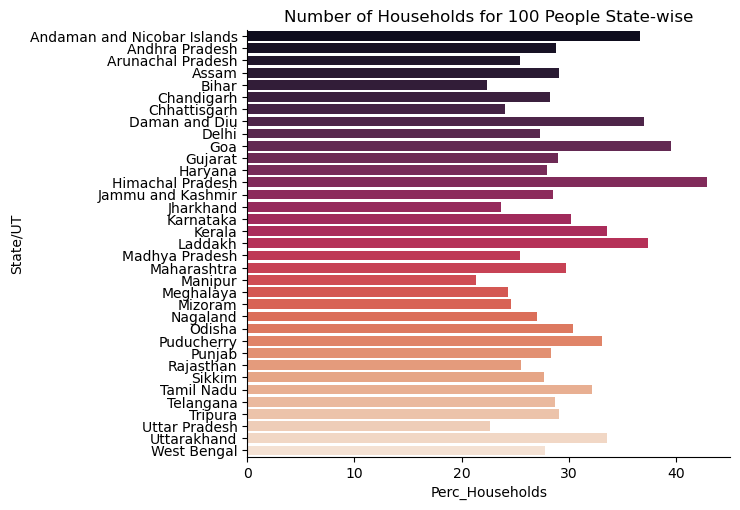

In [55]:
# df1.plot(y='Perc_Households', x='State/UT', figsize=(10,5), kind='bar')

# missing_data.plot(figsize = (10,5), kind='bar')

sns.catplot(data=df1,
           y='State/UT',
           x='Perc_Households',
           palette='rocket',
           kind='bar',
           aspect=1.5)
plt.title('Number of Households for 100 People State-wise')

In [56]:
# sns.barplot(data=df1,
#            y='State/UT',
#            x='Perc_Households')

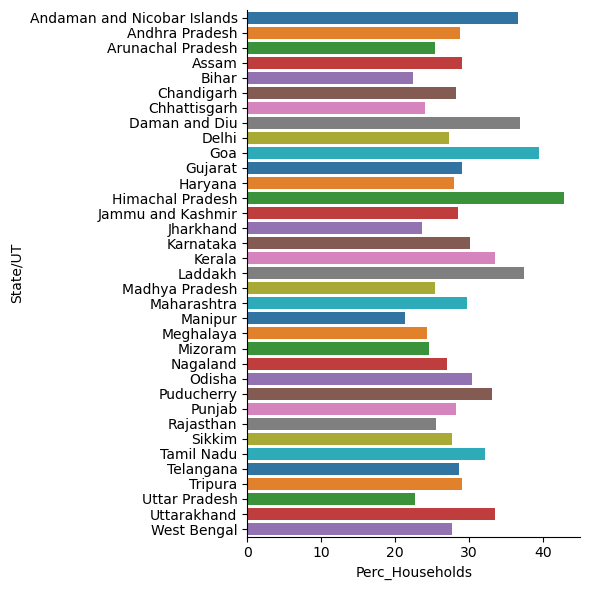

In [57]:
# df1.plot.bar(x='State/UT', y='Perc_Households', figsize=(10, 5))

# plt.xticks(rotation=90)
sns.catplot(data=df1,
           y='State/UT',
           x='Perc_Households',
            kind='bar',
           palette='tab10',
           height=6,
           aspect=1)

### 2.Percentage of households that have toilet(s) in premise to the total number of households.

In [58]:
merge_df.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,92052.478,13150.354,77476.182
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,181664.0,104093.472,14351.456,92466.976
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,23226.0,11496.870,1114.848,16304.652


In [59]:
dfZ = pd.DataFrame(merge_df.groupby('State/UT')['Population','Households', 'Latrine_premise'].sum().reset_index())

In [60]:
dfZ.head()

,State/UT,Population,Households,Latrine_premise
0,Andaman and Nicobar Islands,788110.0,288512.0,1.598266e+05
1,Andhra Pradesh,148160397.0,42637581.0,1.403822e+07
2,Arunachal Pradesh,4151181.0,1055295.0,4.547332e+05
3,Assam,93616728.0,27223509.0,1.174802e+07
4,Bihar,319918575.0,71675913.0,1.122988e+07


In [61]:
dfZ['Perc_LP']= (dfZ['Latrine_premise']/dfZ['Households'])*100
dfZ = dfZ.sort_values( by = ['Perc_LP'], ascending=False)

In [62]:
df2 = pd.DataFrame(merge_df.groupby('State/UT')['Households', 'Latrine_premise'].sum().reset_index())

In [63]:
df2.head()

,State/UT,Households,Latrine_premise
0,Andaman and Nicobar Islands,288512.0,1.598266e+05
1,Andhra Pradesh,42637581.0,1.403822e+07
2,Arunachal Pradesh,1055295.0,4.547332e+05
3,Assam,27223509.0,1.174802e+07
4,Bihar,71675913.0,1.122988e+07


In [64]:
df2['Perc_LP']= (df2['Latrine_premise']/df2['Households'])*100
df2 = df2.sort_values( by = ['Perc_LP'], ascending=False)

In [65]:
df2

,State/UT,Households,Latrine_premise,Perc_LP
16,Kerala,33653559.0,2.136827e+07,63.494827
17,Laddakh,307614.0,1.917481e+05,62.334008
22,Mizoram,808293.0,4.965331e+05,61.429838
8,Delhi,13569104.0,8.232574e+06,60.671462
20,Manipur,1829892.0,1.080549e+06,59.049883
5,Chandigarh,895101.0,5.227746e+05,58.403982
28,Sikkim,507066.0,2.953497e+05,58.246789
31,Tripura,3200589.0,1.839195e+06,57.464270
0,Andaman and Nicobar Islands,288512.0,1.598266e+05,55.396852
9,Goa,1729746.0,9.217921e+05,53.290602


<AxesSubplot:>

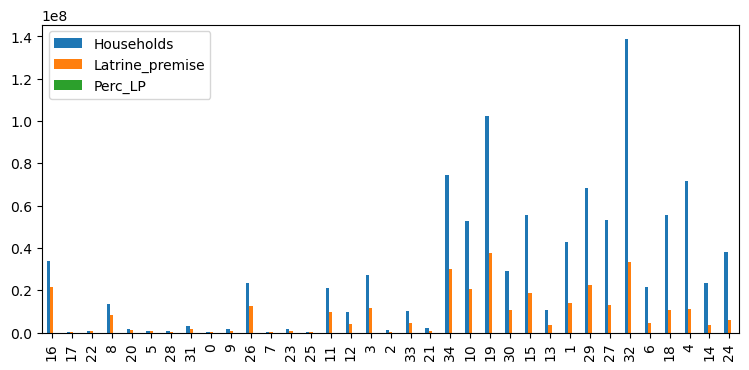

In [66]:
# sns.barplot(data=df2, y= 'Households', x='Latrine_premise')

df2.plot(kind='bar', figsize=(9,4))

Text(0.5, 1.0, 'Percentage of households that have toilet in premise to the total number of households.\n')

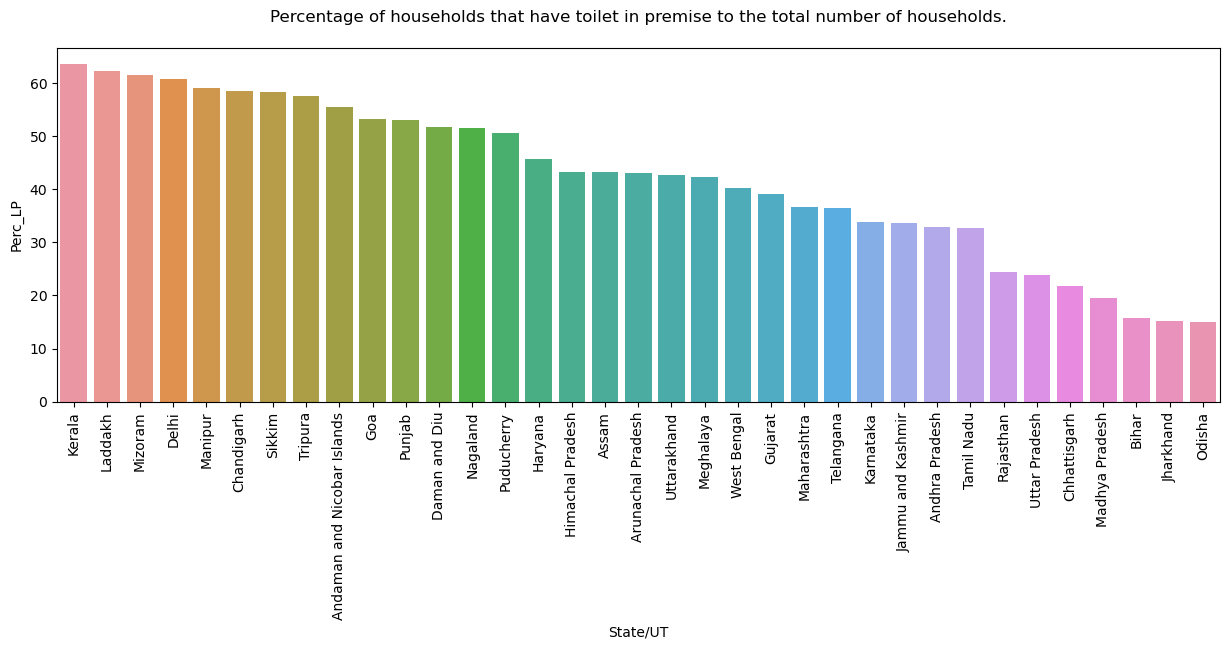

In [67]:
plt.figure(figsize=(15,4.6))
plt.xticks(rotation=90)
sns.barplot(x='State/UT', y ='Perc_LP', data=df2)
plt.title('Percentage of households that have toilet in premise to the total number of households.\n')

In [68]:

# sns.catplot(data=df2,
#            y='State/UT',
#            x='Total Number of households',
#             kind='bar',
#            palette='tab10',
#            height=6,
#            aspect=1)

### 3. Urban to rural population ratio.

In [69]:
#Census and Housing merged file

merge_df.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Rural,158438.0,92052.478,13150.354,77476.182
1,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Total,181664.0,104093.472,14351.456,92466.976
2,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0,Urban,23226.0,11496.870,1114.848,16304.652
3,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Rural,160649.0,74380.487,6265.311,133820.617
4,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0,Total,187839.0,83964.033,7137.882,158348.277


In [70]:
ratio_df = merge_df.groupby('State/UT')['Households_Rural', 'Households_Urban'].sum()
ratio_df.head(3)

,Households_Rural,Households_Urban
State/UT,,
Andaman and Nicobar Islands,136619.0,151893.0
Andhra Pradesh,30270066.0,13555215.0
Arunachal Pradesh,811638.0,297324.0


In [71]:
ratio_df['Ratio'] = ratio_df['Households_Rural']/ratio_df['Households_Urban']

In [72]:
ratio_df.head()

,Households_Rural,Households_Urban,Ratio
State/UT,,,
Andaman and Nicobar Islands,136619.0,151893.0,0.899442
Andhra Pradesh,30270066.0,13555215.0,2.233094
Arunachal Pradesh,811638.0,297324.0,2.729810
Assam,22766994.0,4456515.0,5.108699
Bihar,63424899.0,8251014.0,7.686922


Text(0.5, 1.0, 'Urban to Rural Population Ratio')

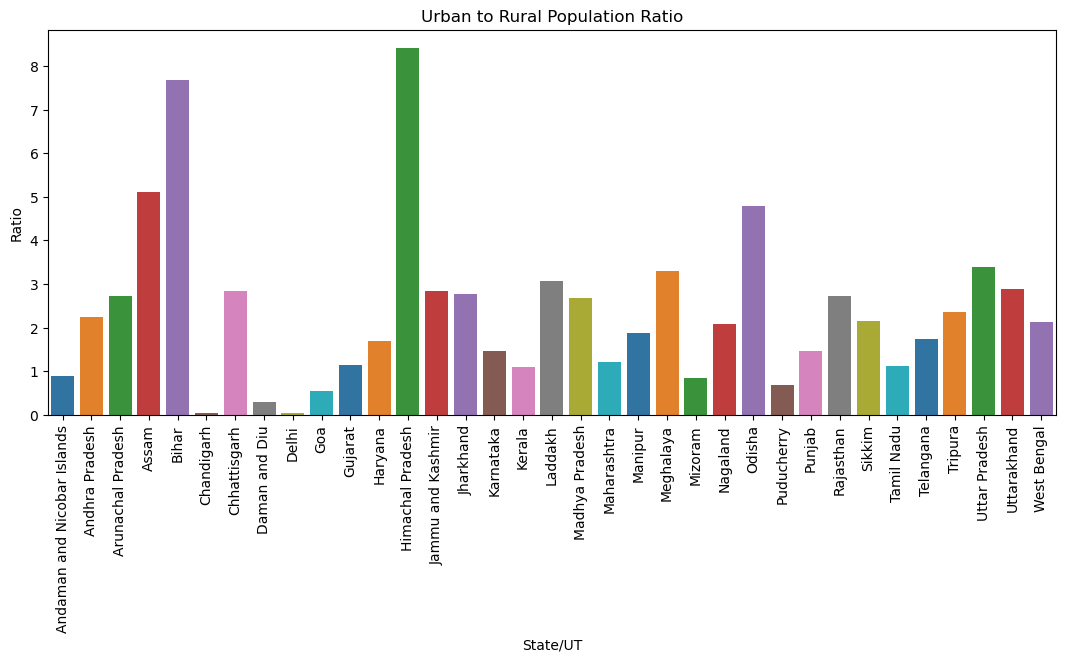

In [73]:
# ratio_df.plot(kind='bar', y='Ratio',figsize=(10,5))

plt.figure(figsize=(13,5))
plt.xticks(rotation=90)
sns.barplot(data=ratio_df,
           x=ratio_df.index,
           y='Ratio',
           palette='tab10')
plt.title('Urban to Rural Population Ratio')

### Problem Statement 9: (Inconsistency in different datasets)


After the updates, the “Households_Rural” and “Households_Urban” data are redundant in both housing and census data. Compare the two data and see if there is a major difference between the values in the two files. A difference of more than 10% can be considered a major difference. Report the names of the districts where a major difference is found in the data.


In [74]:
#df is census.csv file

df.head(3)
# df.shape

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0


In [75]:
#taking district, housholds_rural, households_urban from census file as subset_df1 

subset_df1 = df[['District', 'Households_Rural', 'Households_Urban']]
subset_df1.sort_values('District', inplace=True)
subset_df1

,District,Households_Rural,Households_Urban
531,Adilabad,597466.0,220248.0
145,Agra,496971.0,406852.0
473,Ahmadabad,353169.0,1845383.0
521,Ahmadnagar,1041393.0,282011.0
282,Aizawl,20570.0,80341.0
...,...,...,...
579,Yadgir,207787.0,55208.0
70,Yamunanagar,214464.0,143259.0
633,Yanam,0.0,15519.0
509,Yavatmal,629243.0,168889.0


In [76]:
subset_df1['District'].nunique()

634

In [77]:
#dropping duplicates
# subset_df1 = subset_df1.drop_duplicates('District')

In [78]:
# subset_df1

In [79]:
housing_csv_file.head(3)

,State/UT,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Jammu and Kashmir,Kupwara,158438.0,92052.478,13150.354,77476.182,23226.0,11496.870,1114.848,16304.652
1,Jammu and Kashmir,Badgam,160649.0,74380.487,6265.311,133820.617,27190.0,9190.220,706.940,24579.760
2,Laddakh,Leh(Ladakh),36920.0,19013.800,775.320,32526.520,17474.0,9540.804,192.214,16740.092


In [80]:
#taking district, housholds_rural, households_urban from census file as subset_df2
import warnings
warnings.filterwarnings('ignore')

subset_df2 = housing_csv_file[['District', 'Households_Rural', 'Households_Urban']]
subset_df2.sort_values('District', inplace=True)

In [81]:
subset_df2

,District,Households_Rural,Households_Urban
560,Adilabad,597466.0,220248.0
162,Agra,496971.0,406852.0
507,Ahmadabad,353169.0,1845383.0
550,Ahmadnagar,1041393.0,282011.0
304,Aizawl,20570.0,80341.0
...,...,...,...
578,Y.S.R.,590589.0,293504.0
606,Yadgir,207787.0,55208.0
82,Yamunanagar,214464.0,143259.0
542,Yavatmal,629243.0,168889.0


In [82]:
subset_df2['District'].nunique()

618

In [83]:
# subset_df2 = subset_df2.drop_duplicates('District')

In [84]:
# subset_df2

In [85]:
diff_df = pd.merge(left=subset_df1,
                  right=subset_df2,
                  on='District',
                  how='inner')

In [86]:
diff_df

,District,Households_Rural_x,Households_Urban_x,Households_Rural_y,Households_Urban_y
0,Adilabad,597466.0,220248.0,597466.0,220248.0
1,Agra,496971.0,406852.0,496971.0,406852.0
2,Ahmadabad,353169.0,1845383.0,353169.0,1845383.0
3,Ahmadnagar,1041393.0,282011.0,1041393.0,282011.0
4,Aizawl,20570.0,80341.0,20570.0,80341.0
...,...,...,...,...,...
703,Y.S.R.,590589.0,293504.0,590589.0,293504.0
704,Yadgir,207787.0,55208.0,207787.0,55208.0
705,Yamunanagar,214464.0,143259.0,214464.0,143259.0
706,Yavatmal,629243.0,168889.0,629243.0,168889.0


In [87]:
diff_df['Rural_diff'] = ((diff_df['Households_Rural_y'] - diff_df['Households_Rural_x']) / diff_df['Households_Rural_x'])*100
diff_df['Urban_diff'] = ((diff_df['Households_Urban_y'] - diff_df['Households_Urban_x']) / diff_df['Households_Urban_x'])*100


In [88]:
diff_df

,District,Households_Rural_x,Households_Urban_x,Households_Rural_y,Households_Urban_y,Rural_diff,Urban_diff
0,Adilabad,597466.0,220248.0,597466.0,220248.0,0.0,0.0
1,Agra,496971.0,406852.0,496971.0,406852.0,0.0,0.0
2,Ahmadabad,353169.0,1845383.0,353169.0,1845383.0,0.0,0.0
3,Ahmadnagar,1041393.0,282011.0,1041393.0,282011.0,0.0,0.0
4,Aizawl,20570.0,80341.0,20570.0,80341.0,0.0,0.0
...,...,...,...,...,...,...,...
703,Y.S.R.,590589.0,293504.0,590589.0,293504.0,0.0,0.0
704,Yadgir,207787.0,55208.0,207787.0,55208.0,0.0,0.0
705,Yamunanagar,214464.0,143259.0,214464.0,143259.0,0.0,0.0
706,Yavatmal,629243.0,168889.0,629243.0,168889.0,0.0,0.0


In [93]:
duplicates = diff_df[diff_df['Rural_diff'] >= 10]
duplicates.head()

,District,Households_Rural_x,Households_Urban_x,Households_Rural_y,Households_Urban_y,Rural_diff,Urban_diff
37,Aurangabad,428291.0,49006.0,551789.0,427343.0,28.835068,772.021793
38,Aurangabad,428291.0,49006.0,551789.0,427343.0,28.835068,772.021793
39,Aurangabad,428291.0,49006.0,551789.0,427343.0,28.835068,772.021793
41,Aurangabad,428291.0,49006.0,551789.0,427343.0,28.835068,772.021793
96,Bijapur,50449.0,7942.0,396449.0,131041.0,685.841147,1549.974817


In [95]:
duplicates = diff_df[diff_df['Rural_diff'] >= 10].drop_duplicates()

In [96]:
duplicates.head()

,District,Households_Rural_x,Households_Urban_x,Households_Rural_y,Households_Urban_y,Rural_diff,Urban_diff
37,Aurangabad,428291.0,49006.0,551789.0,427343.0,28.835068,772.021793
96,Bijapur,50449.0,7942.0,396449.0,131041.0,685.841147,1549.974817
122,Bilaspur,152458.0,11987.0,549632.0,188174.0,260.513715,1469.817302
262,Hamirpur,196116.0,15232.0,256081.0,55300.0,30.576292,263.051471
497,Pratapgarh,209813.0,24269.0,711085.0,41701.0,238.913699,71.828258


In [97]:
duplicates['District']

37     Aurangabad
96        Bijapur
122      Bilaspur
262      Hamirpur
497    Pratapgarh
532       Raigarh
Name: District, dtype: object

## Problem Statement 10: (Fix the header)


Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file).


In [114]:
hospitals_df = pd.read_csv('hospitals.csv')
hospitals_df.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [115]:
hospitals_df.rename({
    'Unnamed: 0' : 'State/UT',
    'PHC' : 'Number of Primary Health Centers(PHCs)',
    'CHC' : 'Community Health Centers(CHCs)', 
    'SDH' : 'Sub-District/Divisional Hospitals(SDHs)',
    'DH' : 'District Hospitals(DHs)'
},
                   axis = 1,
                   inplace = True)

hospitals_df.head()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [116]:
hospitals_df.shape

(37, 7)

In [117]:
# hospitals_df['State/UT']

### Problem Statement 11: (Create a function to alter the data to create uniformity)

In [203]:
def update(state):
    return state.replace(' & ', ' and ')
hospitals_df['State/UT'] = hospitals_df['State/UT'].apply(update)

hospitals_df.loc[(hospitals_df['State/UT'] == 'Puducherry'), ['State/UT']] = 'Pondicherry'

In [205]:
hospitals_df

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


creating 'all_hospitals.csv' file

In [120]:
# hospitals_csv_file = hospitals_df.to_csv('Clean_Data/all_hospitals.csv', index = True)

### Problem Statement 12: (Analyze Healthcare facility disparity)


Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. The national value should also be represented in the same visualization such that the value for each state can be compared to it.  


In [121]:
hospitals_df

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [122]:
# hospitals_df.drop(columns=['for_every_10000'], inplace=True)

In [123]:
hospitals_df.head(1)

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246


In [124]:
# hospitals_df['State/UT'].unique()

In [125]:
#df is census file from Clean_Data folder

df1.head(2)

,State/UT,Population,Households,Perc_Households
0,Andaman and Nicobar Islands,788110.0,288512.0,36.608088
1,Andhra Pradesh,148160397.0,42637581.0,28.777988


In [126]:
# convert_dict = {'HospitalBeds': int
#                 }
 
# hospitals_df['HospitalBeds']= pd.to_numeric(hospitals_df['HospitalBeds'])
# hospitals_df.info()

#hospitals_df['HospitalBeds'] = hospitals_df['HospitalBeds'].astype("int64")
# =pd.Series(['260,327,021']).str.replace(',', '').astype(int)

a = hospitals_df.loc[36, 'HospitalBeds']
b = a.split(',')
c="".join(b)
hospitals_df.loc[36,'HospitalBeds']=c

#beds_series = pd.Series(hospitals_df['HospitalBeds'])
#pd.to_numeric(beds_series)

In [127]:
hospitals_df['HospitalBeds'] = hospitals_df['HospitalBeds'].astype("int64")

In [128]:
# hospital_beds_df['for_every_10000'] = pd.to_numeric(hospital_beds_df['HospitalBeds']) / 10000


hospitals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State/UT                                 37 non-null     object
 1   Number of Primary Health Centers(PHCs)   37 non-null     object
 2   Community Health Centers(CHCs)           37 non-null     object
 3   Sub-District/Divisional Hospitals(SDHs)  30 non-null     object
 4   District Hospitals(DHs)                  37 non-null     object
 5   Hospitals                                37 non-null     object
 6   HospitalBeds                             37 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 2.1+ KB


In [129]:
# hospital_beds_df = hospitals_df.groupby('State/UT')['HospitalBeds'].sum().reset_index()
# hospital_beds_df.head()

In [130]:
hospital_beds_df = hospitals_df[['State/UT', 'HospitalBeds']]

In [131]:
hospital_beds_df

,State/UT,HospitalBeds
0,Andaman and Nicobar Islands,1246
1,Andhra Pradesh,60799
2,Arunachal Pradesh,2320
3,Assam,19115
4,Bihar,17796
5,Chandigarh,3756
6,Chhattisgarh,14354
7,Dadra and Nagar Haveli,568
8,Daman and Diu,298
9,Delhi,20572


In [132]:
# hospital_beds_df.drop(0)

In [133]:

# hospital_beds_df.plot(figsize=(10,5), kind='bar')


In [134]:
#creating population dataframe from census.csv file

pop_df = df.groupby('State/UT')['Population'].sum().reset_index()
pop_df

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,49386799.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0
5,Chandigarh,1055450.0
6,Chhattisgarh,25545198.0
7,Dadra and Nagar Haveli,343709.0
8,Daman and Diu,243247.0
9,Delhi,16787941.0


In [135]:
pop_df

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,49386799.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0
5,Chandigarh,1055450.0
6,Chhattisgarh,25545198.0
7,Dadra and Nagar Haveli,343709.0
8,Daman and Diu,243247.0
9,Delhi,16787941.0


In [136]:
tenThousand_people = pd.merge(left=hospital_beds_df,
                             right=pop_df,
                             on='State/UT')

In [137]:
tenThousand_people

,State/UT,HospitalBeds,Population
0,Andaman and Nicobar Islands,1246,380581.0
1,Andhra Pradesh,60799,49386799.0
2,Arunachal Pradesh,2320,1383727.0
3,Assam,19115,31205576.0
4,Bihar,17796,104099452.0
5,Chandigarh,3756,1055450.0
6,Chhattisgarh,14354,25545198.0
7,Dadra and Nagar Haveli,568,343709.0
8,Daman and Diu,298,243247.0
9,Delhi,20572,16787941.0


In [138]:
tenThousand_people['for_every_10000'] = (tenThousand_people['HospitalBeds'] / tenThousand_people['Population'])*10000

In [139]:
tenThousand_people

,State/UT,HospitalBeds,Population,for_every_10000
0,Andaman and Nicobar Islands,1246,380581.0,32.739417
1,Andhra Pradesh,60799,49386799.0,12.310780
2,Arunachal Pradesh,2320,1383727.0,16.766313
3,Assam,19115,31205576.0,6.125508
4,Bihar,17796,104099452.0,1.709519
5,Chandigarh,3756,1055450.0,35.586717
6,Chhattisgarh,14354,25545198.0,5.619060
7,Dadra and Nagar Haveli,568,343709.0,16.525607
8,Daman and Diu,298,243247.0,12.250922
9,Delhi,20572,16787941.0,12.254034


In [140]:
def change_dtype(float_num):
    return int(float_num)
tenThousand_people['for_every_10000'] = tenThousand_people['for_every_10000'].apply(change_dtype)

In [141]:
tenThousand_people = tenThousand_people.sort_values('for_every_10000', ascending=True)

In [142]:
tenThousand_people

,State/UT,HospitalBeds,Population,for_every_10000
4,Bihar,17796,104099452.0,1
32,Uttar Pradesh,58310,199812341.0,2
15,Jharkhand,7404,32988134.0,2
25,Odisha,16497,41974218.0,3
30,Telangana,17358,35193978.0,4
26,Punjab,13527,27743338.0,4
12,Haryana,13841,25351462.0,5
34,West Bengal,51163,91276115.0,5
6,Chhattisgarh,14354,25545198.0,5
19,Madhya Pradesh,38140,72626809.0,5


In [143]:
# beds_per_10k = pd.to_csv('Clean_Data/tenThousand_people')

tenThousand_people.to_csv('Clean_Data/beds_per_10k.csv')

Text(0.5, 1.0, 'Hospital Beds for every 10,000 people by State')

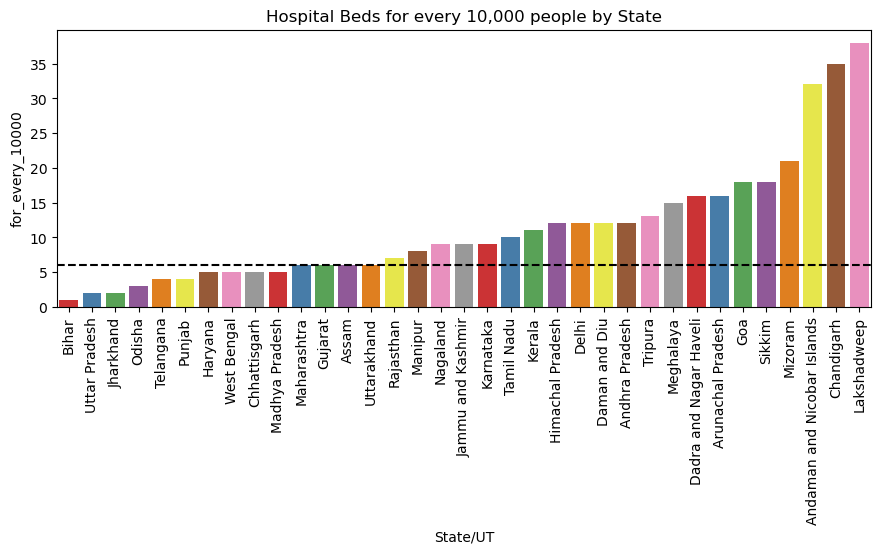

In [144]:
# tenThousand_people.plot(kind='bar', x='State/UT', figsize=(10,5), y='for_every_10000')

plt.figure(figsize=(10.5,3.6))
plt.xticks(rotation=90)
sns.barplot(data=tenThousand_people,
           x='State/UT',
           y='for_every_10000',
           palette='Set1').axhline(6,ls="--",color='Black')
plt.title('Hospital Beds for every 10,000 people by State')

Bihar, Jharkhand, and Uttar Pradesh has low number of beds for 10000 people

In [145]:
# plt.figure(figsize=(10.5,3.6))
# plt.xticks(rotation=90)
# sns.barplot(data=tenThousand_people,
#             x = 'State/UT',
#             y = 'for_every_10000',
#            order = tenThousand_people.sort_values('for_every_10000',ascending=True)['State/UT'],
#            palette = 'rocket').axhline(6,ls="--",color='Black')
# plt.xlabel('State/UT') #, fontweight='bold',fontsize=13.0
# plt.ylabel('Hospital Beds per 10000 people') #, fontweight='bold',fontsize=13.0
# plt.title('Hospital Beds for every 10,000 people State-wise') #,fontweight='bold',fontsize='16.0'

### Problem Statement 13: (Multi-line header)


The header in (Data/government_hospitals.csv) is in 2 rows 

    States/UTs |	Rural hospitals	|  Urban hospitals	As on

                        No.	Beds	No.	Beds	

The headers are required to be edited for ease of future use as well as for the sake of uniformity. 


Import and update the data in a way that it has the following column names

	State/UT
	Rural_Government_Hospitals
	Rural_Government_Beds
	Urban_Government_Hospitals
	Urban_Government_Beds
	Last_Updated


In [146]:
import pandas as pd

gov_hospitals_df = pd.read_csv('government_hospitals.csv')
gov_hospitals_df.head()

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


In [147]:
#renaming the columns after reading the government hospitals csv

gov_hospitals_df.rename({
    'States/UTs' : 'State/UT',
    'Rural hospitals' : 'Rural_Government_Hospitals',
    'Unnamed: 2' : 'Rural_Government_Beds',
    'Urban hospitals' : 'Urban_Government_Hospitals',
    'Unnamed: 4' : 'Urban_Government_Beds',
    'As on' : 'Last_Updated'
},
                       axis=1,
                       inplace=True)
gov_hospitals_df.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016


In [148]:
#dropping the first row as it is not required in the DataFrame

drop_row = gov_hospitals_df.drop(0, inplace=True)

In [149]:
gov_hospitals_df

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017
10,Jammu & Kashmir,56,7234,76,4417,30.12.2016


### Problem Statement 14: (Data update and code reuse)


The State/UT names have some different formats compared to other census and housing data. Fix those issues using the function created earlier. If the function created earlier for all_hospitals cannot be used for government_hospital then edit the function so that it can be used for both.


In [150]:
def update(state):
    return state.replace(' & ', ' and ')
gov_hospitals_df['State/UT'] = gov_hospitals_df['State/UT'].apply(update)

gov_hospitals_df.loc[(gov_hospitals_df['State/UT'] == 'Puducherry'), ['State/UT']] = 'Pondicherry'


def strip_star(state):
    return state.strip('*')
gov_hospitals_df['State/UT'] = gov_hospitals_df['State/UT'].apply(strip_star)

In [151]:
gov_hospitals_df

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana,609,6690,59,4550,31.12.2016
9,Himachal Pradesh,705,5665,96,6734,31.12.2017
10,Jammu and Kashmir,56,7234,76,4417,30.12.2016



The ”Last_Updated” column contains a date that is in the format  DD.MM.YYYY but in the future, the date is required in a different format (YYYY-MM-DD)  update the date to the required format.

In [152]:
#changing the datetime format from DD.MM.YYYY to YYYY-MM-DD

gov_hospitals_df['Last_Updated'] = pd.to_datetime(gov_hospitals_df.Last_Updated)

In [153]:
gov_hospitals_df.tail()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
33,Daman and Diu,5,240,0,0,2015-12-31
34,Delhi,0,0,109,24383,2015-01-01
35,Lakshadweep,9,300,0,0,2016-01-01
36,Pondicherry,3,96,11,3473,2016-01-01
37,INDIA,19810,279588,3772,431173,NaT


In [154]:
#dropping last row i.e., India row which is not required

drop_last_row = gov_hospitals_df.drop(37, inplace=True)

In [155]:
gov_hospitals_df.head(2)

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31


Create a new file “government_hospital.csv” in the “Clean” folder and save all the government hospital data after the update.


In [156]:
#creating new csv file in clean data folder

# gov_hospitals_df.to_csv('Clean_Data/government_hospital.csv')

### Problem Statement 15: (Government healthcare facility disparity)

In [157]:
# hospitals_df.head()
# gov_hospitals_df.head()

In [158]:
# hospitals_df.head()

In [159]:
tenThousand_people.head(3)

,State/UT,HospitalBeds,Population,for_every_10000
4,Bihar,17796,104099452.0,1
32,Uttar Pradesh,58310,199812341.0,2
15,Jharkhand,7404,32988134.0,2


In [160]:
# govtHospBeds_least3States = gov_hospitals_df.loc[gov_hospitals_df['State/UT'].isin(tenThousand_people),
#                                           ['State/UT']]

In [161]:
least3States = tenThousand_people[:3]
least3States

,State/UT,HospitalBeds,Population,for_every_10000
4,Bihar,17796,104099452.0,1
32,Uttar Pradesh,58310,199812341.0,2
15,Jharkhand,7404,32988134.0,2


Text(0.5, 1.0, '3 States with Least Hospital Beds per 10k people\n')

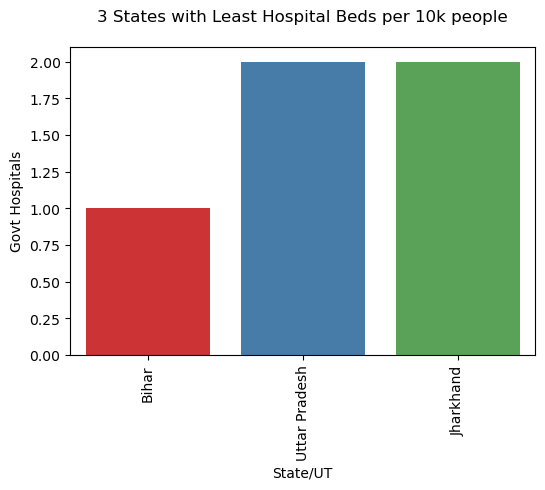

In [162]:
plt.figure(figsize=(6,4))
plt.xticks(rotation=90)
sns.barplot(data=least3States,
            x = 'State/UT',
            y = 'for_every_10000',
           palette = 'Set1')

plt.xlabel('State/UT') #, fontweight='bold',fontsize=12.0
plt.ylabel('Govt Hospitals') #, fontweight='bold',fontsize=12.0
plt.title('3 States with Least Hospital Beds per 10k people\n') #,fontweight='heavy',fontsize='16.0',family='arial'

### Problem Statement 16: (Gap in number of beds)


Visually represent the difference between the expected number of hospital beds and the available number of hospital beds in each State/UT, as well as at the national level (if any).


In [163]:
hospitals_df

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [164]:
hospitals_df.drop(36, inplace=True)

In [165]:
hospitals_df

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [166]:
df1.head(2)

,State/UT,Population,Households,Perc_Households
0,Andaman and Nicobar Islands,788110.0,288512.0,36.608088
1,Andhra Pradesh,148160397.0,42637581.0,28.777988


In [167]:
#df is census.csv file
df.head(3)

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Jammu and Kashmir,Kupwara,870354.0,474190.0,396164.0,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Jammu and Kashmir,Badgam,753745.0,398041.0,355704.0,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Laddakh,Leh(Ladakh),133487.0,78971.0,54516.0,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0


In [169]:
#creating population dataframe from census.csv file

pop_df = df.groupby('State/UT')['Population'].sum().reset_index()
pop_df

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,49386799.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0
5,Chandigarh,1055450.0
6,Chhattisgarh,25545198.0
7,Dadra and Nagar Haveli,343709.0
8,Daman and Diu,243247.0
9,Delhi,16787941.0


In [170]:
pop_df['State/UT'].nunique()

37

In [171]:
df_GapInBeds = pd.merge(left=hospitals_df,
                       right=pop_df,
                       on=['State/UT'],
                       how='inner')

df_GapInBeds = df_GapInBeds[['State/UT', 'Population', 'HospitalBeds']]
df_GapInBeds

,State/UT,Population,HospitalBeds
0,Andaman and Nicobar Islands,380581.0,1246
1,Andhra Pradesh,49386799.0,60799
2,Arunachal Pradesh,1383727.0,2320
3,Assam,31205576.0,19115
4,Bihar,104099452.0,17796
5,Chandigarh,1055450.0,3756
6,Chhattisgarh,25545198.0,14354
7,Dadra and Nagar Haveli,343709.0,568
8,Daman and Diu,243247.0,298
9,Delhi,16787941.0,20572


In [172]:
df_GapInBeds['State/UT'].nunique()

35

In [173]:
#changing datatype of hospitalbeds column as it is object type to int type

#  def changing_dtype(beds):
#     return int(beds)

# df_GapInBeds['HospitalBeds'] = df_GapInBeds['HospitalBeds'].apply(changing_dtype)

df_GapInBeds

,State/UT,Population,HospitalBeds
0,Andaman and Nicobar Islands,380581.0,1246
1,Andhra Pradesh,49386799.0,60799
2,Arunachal Pradesh,1383727.0,2320
3,Assam,31205576.0,19115
4,Bihar,104099452.0,17796
5,Chandigarh,1055450.0,3756
6,Chhattisgarh,25545198.0,14354
7,Dadra and Nagar Haveli,343709.0,568
8,Daman and Diu,243247.0,298
9,Delhi,16787941.0,20572


In [174]:
# df_GapInBeds.info()

In [175]:
#According to WHO standards, a minimum of 3 beds per 1000 people is required

df_GapInBeds['available_beds_per1000'] = df_GapInBeds['HospitalBeds']/ df_GapInBeds['Population']*1000

def dtype_change(beds):
    return int(beds)

df_GapInBeds['available_beds_per1000'] = df_GapInBeds['available_beds_per1000'].apply(dtype_change)

df_GapInBeds

,State/UT,Population,HospitalBeds,available_beds_per1000
0,Andaman and Nicobar Islands,380581.0,1246,3
1,Andhra Pradesh,49386799.0,60799,1
2,Arunachal Pradesh,1383727.0,2320,1
3,Assam,31205576.0,19115,0
4,Bihar,104099452.0,17796,0
5,Chandigarh,1055450.0,3756,3
6,Chhattisgarh,25545198.0,14354,0
7,Dadra and Nagar Haveli,343709.0,568,1
8,Daman and Diu,243247.0,298,1
9,Delhi,16787941.0,20572,1


In [176]:
#expected number of beds per 1000 people

def expected(beds):
    if beds<3:
        return (3-beds)
    else:
        return 0

df_GapInBeds['expectedBeds_per1000'] = df_GapInBeds['available_beds_per1000'].apply(expected)

df_GapInBeds

,State/UT,Population,HospitalBeds,available_beds_per1000,expectedBeds_per1000
0,Andaman and Nicobar Islands,380581.0,1246,3,0
1,Andhra Pradesh,49386799.0,60799,1,2
2,Arunachal Pradesh,1383727.0,2320,1,2
3,Assam,31205576.0,19115,0,3
4,Bihar,104099452.0,17796,0,3
5,Chandigarh,1055450.0,3756,3,0
6,Chhattisgarh,25545198.0,14354,0,3
7,Dadra and Nagar Haveli,343709.0,568,1,2
8,Daman and Diu,243247.0,298,1,2
9,Delhi,16787941.0,20572,1,2


In [177]:
new_df = df_GapInBeds[['State/UT', 'available_beds_per1000','expectedBeds_per1000']]

In [178]:
new_df.head()

,State/UT,available_beds_per1000,expectedBeds_per1000
0,Andaman and Nicobar Islands,3,0
1,Andhra Pradesh,1,2
2,Arunachal Pradesh,1,2
3,Assam,0,3
4,Bihar,0,3


In [179]:
# new_df.to_csv('Clean_Data/new_df.csv')

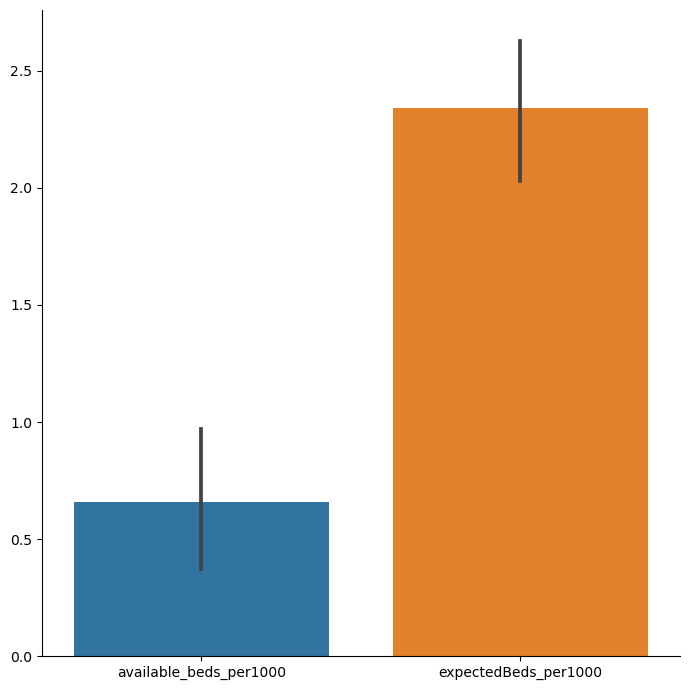

In [180]:
# new_df.plot(kind='bar', x='State/UT', figsize=(10,5))

sns.catplot(data=new_df,
           kind='bar',
           height=7)

<AxesSubplot:xlabel='State/UT'>

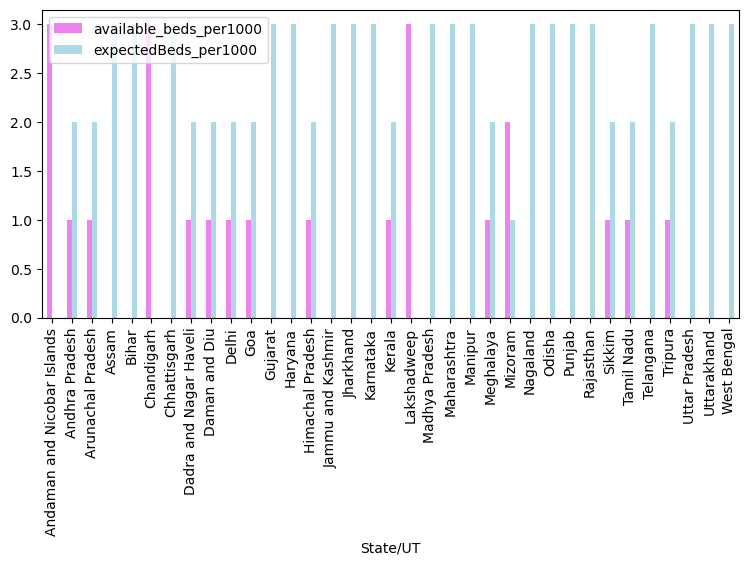

In [181]:
new_df.plot(kind='bar', x='State/UT', figsize=(9,4), color={'available_beds_per1000': 'violet', 'expectedBeds_per1000' : 'lightblue'})
# plt.title('Hospital Beds for every 10,000 people by State')



Text(0.5, 1.0, 'Hospital Beds per 1000 People State-wise')

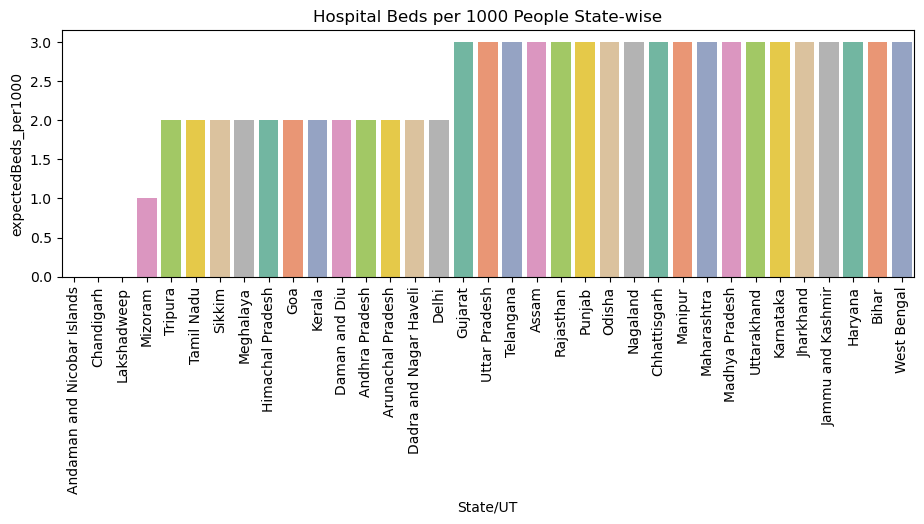

In [182]:
plt.figure(figsize=(11,3.2))
plt.xticks(rotation=90)
sns.barplot(data=new_df,
            x = 'State/UT',
            y='expectedBeds_per1000',
            order=new_df.sort_values('expectedBeds_per1000',ascending=True)['State/UT'],
            palette = 'Set2')
plt.title('Hospital Beds per 1000 People State-wise')

In [183]:
StatesMeet_WHOStd = ['Lakshadweep','Puducherry','Chandigarh','Andaman and Nicobar Islands']

### Problem Statement 17: (Hospitals required to meet the standards)

In a hypothetical situation if the government wishes to fill the gap between the available facility and the WHO standards all by itself how many government hospitals may be required in each state or union territory as well as at the national level?

Find the average number of beds in a government hospital. Divide it by the gap in the number of beds to reach the standards in the region, and round the number to the nearest integer to find the value.
Represent the findings visually.


In [184]:
# Filtering States to get States which do not meet WHO Standards 

StatesNotMeet_WHO = df_GapInBeds[~df_GapInBeds['State/UT'].isin(StatesMeet_WHOStd)] 

In [185]:
StatesNotMeet_WHO.head()

,State/UT,Population,HospitalBeds,available_beds_per1000,expectedBeds_per1000
1,Andhra Pradesh,49386799.0,60799,1,2
2,Arunachal Pradesh,1383727.0,2320,1,2
3,Assam,31205576.0,19115,0,3
4,Bihar,104099452.0,17796,0,3
6,Chhattisgarh,25545198.0,14354,0,3


In [186]:
# Firstly calculating Beds required for the given Population according to our understanding of beds required Per 1000 People:

StatesNotMeet_WHO['RequiredBeds_forPopulation'] = 0.003 * StatesNotMeet_WHO['Population']

# Calculating Gap in No. of Beds State-wise using:
# Gap in No. of Beds = Required Beds - Hospital Beds (available)

StatesNotMeet_WHO['Gap_inBedNum'] = StatesNotMeet_WHO['RequiredBeds_forPopulation'] - StatesNotMeet_WHO['HospitalBeds']

StatesNotMeet_WHO.head()


,State/UT,Population,HospitalBeds,available_beds_per1000,expectedBeds_per1000,RequiredBeds_forPopulation,Gap_inBedNum
1,Andhra Pradesh,49386799.0,60799,1,2,148160.397,87361.397
2,Arunachal Pradesh,1383727.0,2320,1,2,4151.181,1831.181
3,Assam,31205576.0,19115,0,3,93616.728,74501.728
4,Bihar,104099452.0,17796,0,3,312298.356,294502.356
6,Chhattisgarh,25545198.0,14354,0,3,76635.594,62281.594


In [187]:
gov_hospitals_df.head()

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last_Updated
1,Andhra Pradesh,193,6480,65,16658,2017-01-01
2,Arunachal Pradesh,208,2136,10,268,2017-12-31
3,Assam,1176,10944,50,6198,2017-12-31
4,Bihar,930,6083,103,5936,2016-12-31
5,Chhattisgarh,169,5070,45,4342,2016-01-01


In [188]:
govHosp_df = gov_hospitals_df.copy()


# Calculating Total Hospitals and Beds in each State

govHosp_df['Total_Hospitals'] = govHosp_df['Rural_Government_Hospitals'] + govHosp_df['Urban_Government_Hospitals']
govHosp_df['Total_Beds'] = govHosp_df['Rural_Government_Beds'] + govHosp_df['Urban_Government_Beds']

In [189]:
# Extracting relevant columns so as to merge "Govt Hospital" data with "StatesNotMeet_WHO" data

govHosp_df = govHosp_df[['State/UT','Total_Hospitals','Total_Beds']]

In [190]:
govHosp_df.head()

,State/UT,Total_Hospitals,Total_Beds
1,Andhra Pradesh,19365,648016658
2,Arunachal Pradesh,20810,2136268
3,Assam,117650,109446198
4,Bihar,930103,60835936
5,Chhattisgarh,16945,50704342


In [191]:
# Merging Govt Hospital data with States Not Meeting WHO Standards

StatesNotMeetWHO_govtHosp = pd.merge(StatesNotMeet_WHO, govHosp_df, how='left',on=['State/UT'])

StatesNotMeetWHO_govtHosp

,State/UT,Population,HospitalBeds,available_beds_per1000,expectedBeds_per1000,RequiredBeds_forPopulation,Gap_inBedNum,Total_Hospitals,Total_Beds
0,Andhra Pradesh,49386799.0,60799,1,2,148160.397,87361.397,19365,648016658
1,Arunachal Pradesh,1383727.0,2320,1,2,4151.181,1831.181,20810,2136268
2,Assam,31205576.0,19115,0,3,93616.728,74501.728,117650,109446198
3,Bihar,104099452.0,17796,0,3,312298.356,294502.356,930103,60835936
4,Chhattisgarh,25545198.0,14354,0,3,76635.594,62281.594,16945,50704342
5,Dadra and Nagar Haveli,343709.0,568,1,2,1031.127,463.127,101,273316
6,Daman and Diu,243247.0,298,1,2,729.741,431.741,50,2400
7,Delhi,16787941.0,20572,1,2,50363.823,29791.823,0109,024383
8,Goa,1458545.0,2666,1,2,4375.635,1709.635,1725,14051608
9,Gujarat,60439692.0,41129,0,3,181319.076,140190.076,364122,1171520565


In [192]:
StatesNotMeetWHO_govtHosp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   State/UT                    32 non-null     object 
 1   Population                  32 non-null     float64
 2   HospitalBeds                32 non-null     int64  
 3   available_beds_per1000      32 non-null     int64  
 4   expectedBeds_per1000        32 non-null     int64  
 5   RequiredBeds_forPopulation  32 non-null     float64
 6   Gap_inBedNum                32 non-null     float64
 7   Total_Hospitals             32 non-null     object 
 8   Total_Beds                  32 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 2.5+ KB


In [193]:
def dtype_change(total_hospitals):
    return int(total_hospitals)
StatesNotMeetWHO_govtHosp['Total_Hospitals'] = StatesNotMeetWHO_govtHosp['Total_Hospitals'].apply(dtype_change)

In [194]:
def dtype_change(total_beds):
    return int(total_beds)
StatesNotMeetWHO_govtHosp['Total_Beds'] = StatesNotMeetWHO_govtHosp['Total_Beds'].apply(dtype_change)

In [195]:
# Calculating Beds per Hospital in each State (on average)

StatesNotMeetWHO_govtHosp['Beds_PerHosp'] = ((StatesNotMeetWHO_govtHosp['Total_Beds'] 
                                             / StatesNotMeetWHO_govtHosp['Total_Hospitals'])
                                             .astype('int32'))

In [196]:
StatesNotMeetWHO_govtHosp['Hosp_Required'] = ((StatesNotMeetWHO_govtHosp['Gap_inBedNum'] 
                                              / StatesNotMeetWHO_govtHosp['Beds_PerHosp'])
                                             .apply(np.ceil))

In [197]:
StatesNotMeetWHO_govtHosp

,State/UT,Population,HospitalBeds,available_beds_per1000,expectedBeds_per1000,RequiredBeds_forPopulation,Gap_inBedNum,Total_Hospitals,Total_Beds,Beds_PerHosp,Hosp_Required
0,Andhra Pradesh,49386799.0,60799,1,2,148160.397,87361.397,19365,648016658,33463,3.0
1,Arunachal Pradesh,1383727.0,2320,1,2,4151.181,1831.181,20810,2136268,102,18.0
2,Assam,31205576.0,19115,0,3,93616.728,74501.728,117650,109446198,930,81.0
3,Bihar,104099452.0,17796,0,3,312298.356,294502.356,930103,60835936,65,4531.0
4,Chhattisgarh,25545198.0,14354,0,3,76635.594,62281.594,16945,50704342,2992,21.0
5,Dadra and Nagar Haveli,343709.0,568,1,2,1031.127,463.127,101,273316,2706,1.0
6,Daman and Diu,243247.0,298,1,2,729.741,431.741,50,2400,48,9.0
7,Delhi,16787941.0,20572,1,2,50363.823,29791.823,109,24383,223,134.0
8,Goa,1458545.0,2666,1,2,4375.635,1709.635,1725,14051608,8145,1.0
9,Gujarat,60439692.0,41129,0,3,181319.076,140190.076,364122,1171520565,3217,44.0


In [206]:

# StatesNotMeetWHO_govtHosp=StatesNotMeetWHO_govtHosp.iloc[:-1,:]
# StatesNotMeetWHO_govtHosp

In [199]:
#converting to csv format
StatesNotMeetWHO_govtHosp.to_csv('Clean_Data/last_df.csv')

Text(0.5, 1.0, 'Hospitals Required in each State/UT')

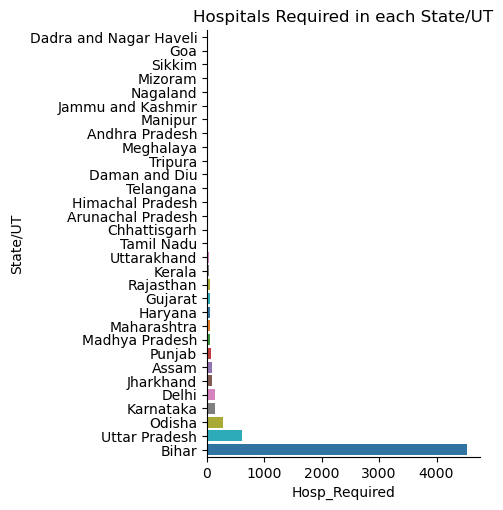

In [200]:
sns.catplot(data=StatesNotMeetWHO_govtHosp,
            y = 'State/UT',
             x= 'Hosp_Required',
            order=StatesNotMeetWHO_govtHosp.sort_values('Hosp_Required',ascending=True)['State/UT'],
            palette = 'tab10',
            kind='bar',
           aspect=1)
plt.title('Hospitals Required in each State/UT')